In [5]:
#AI MODEL FOR MOCK DATA

# Import libraries
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

# Set random seed for reproducibility
np.random.seed(42)

# Sample mock data creation
n_samples = 100

# Generate mock data
data = {
    'role': np.random.choice(['Admin', 'User', 'Manager'], n_samples),
    'department': np.random.choice(['IT', 'HR', 'Finance'], n_samples),
    'status_user': np.random.choice(['active', 'inactive'], n_samples),
    'assignedat': [datetime.now() - timedelta(days=int(x)) for x in np.random.uniform(1, 365, n_samples)],
    'preferred_key_type': np.random.choice(['Standard', 'Biometric', 'Pin-Based'], n_samples),
    'role_key_match_score': np.random.uniform(0.5, 1.0, n_samples)
}

# Create DataFrame
mock_df = pd.DataFrame(data)

# Feature engineering
# Calculate days since assignment
mock_df['days_since_assignment'] = (datetime.now() - mock_df['assignedat']).dt.days

# Define the target variable: whether a key is assigned (1) or not (0)
mock_df['key_assigned'] = np.random.choice([0, 1], n_samples)

# Handling missing values (if any)
mock_df.fillna(mock_df.mean(numeric_only=True), inplace=True)

# Encode categorical variables
le_role = LabelEncoder()
le_department = LabelEncoder()
le_status = LabelEncoder()
le_key_type = LabelEncoder()

mock_df['role_encoded'] = le_role.fit_transform(mock_df['role'])
mock_df['department_encoded'] = le_department.fit_transform(mock_df['department'])
mock_df['status_encoded'] = le_status.fit_transform(mock_df['status_user'])
mock_df['preferred_key_type_encoded'] = le_key_type.fit_transform(mock_df['preferred_key_type'])

# Display the first few rows of the DataFrame
print("Sample Data:")
print(mock_df.head())

# Define feature matrix (X) and target variable (y) for key assignment
features = [
    'role_encoded', 'department_encoded', 'status_encoded',
    'days_since_assignment', 'preferred_key_type_encoded', 'role_key_match_score'
]
X = mock_df[features]
y = mock_df['key_assigned']

# Display the feature matrix and target variable
print("\nFeature Matrix (X):")
print(X.head())
print("\nTarget Variable (y):")
print(y.head())

# Split the dataset into training and testing sets for key assignment model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\nTraining Set Size: {X_train.shape}")
print(f"Testing Set Size: {X_test.shape}")

# Initialize and train the Random Forest Classifier for key assignment
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions for key assignment
y_pred = rf_model.predict(X_test)

# Evaluate the key assignment model's performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("\nKey Assignment Model Evaluation:")
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_rep)
print("\nConfusion Matrix:")
print(conf_matrix)

# Save the evaluation metrics
evaluation_metrics = {
    'accuracy': accuracy,
    'classification_report': classification_rep,
    'confusion_matrix': conf_matrix
}

# Save the trained key assignment model
joblib.dump(rf_model, "random_forest_model.pkl")

# Save evaluation metrics to a file if needed
with open("evaluation_metrics.txt", "w") as f:
    f.write("Key Assignment Model Evaluation Metrics\n")
    f.write(f"Accuracy: {accuracy:.2f}\n\n")
    f.write("Classification Report:\n")
    f.write(classification_rep + "\n")
    f.write("Confusion Matrix:\n")
    f.write(str(conf_matrix) + "\n")

print("\nKey Assignment Model and metrics saved successfully.")

# ----------------------------

# Define new target variable for recommendations (Key Type Prediction)
y_recommendation = mock_df['preferred_key_type_encoded']

# Split the dataset for the recommendation model
X_train, X_test, y_train, y_test = train_test_split(X, y_recommendation, test_size=0.2, random_state=42)

# Initialize and train the model for recommendations
rf_recommendation_model = RandomForestClassifier(random_state=42)
rf_recommendation_model.fit(X_train, y_train)

# Make predictions for recommended key type
y_recommendation_pred = rf_recommendation_model.predict(X_test)

# Evaluate the recommendation model's performance
recommendation_accuracy = accuracy_score(y_test, y_recommendation_pred)
recommendation_classification_rep = classification_report(y_test, y_recommendation_pred)
recommendation_conf_matrix = confusion_matrix(y_test, y_recommendation_pred)

print("\nRecommendation Model Evaluation:")
print(f"Recommendation Accuracy: {recommendation_accuracy:.2f}")
print("\nRecommendation Classification Report:")
print(recommendation_classification_rep)
print("\nRecommendation Confusion Matrix:")
print(recommendation_conf_matrix)

# Save the trained recommendation model
joblib.dump(rf_recommendation_model, "key_type_recommendation_model.pkl")

print("\nRecommendation Model saved successfully.")

Sample Data:
      role department status_user                 assignedat  \
0  Manager    Finance    inactive 2024-05-08 01:35:18.790633   
1    Admin    Finance      active 2024-08-10 01:35:18.790633   
2  Manager    Finance    inactive 2023-11-16 01:35:18.790633   
3  Manager         IT      active 2023-11-27 01:35:18.790633   
4    Admin    Finance    inactive 2024-04-23 01:35:18.790633   

  preferred_key_type  role_key_match_score  days_since_assignment  \
0          Biometric              0.513256                    189   
1           Standard              0.792888                     95   
2          Biometric              0.970115                    363   
3          Biometric              0.787737                    352   
4          Biometric              0.694085                    204   

   key_assigned  role_encoded  department_encoded  status_encoded  \
0             0             1                   0               1   
1             1             0                   0

C:\Users\Gauri Patole\AppData\Local\Temp\ipykernel_18740\3955254958.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='key_assigned', data=mock_df, palette='Set2')


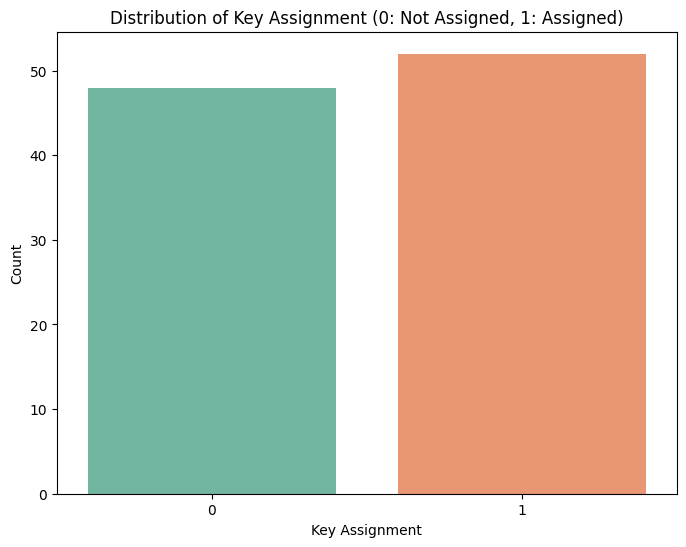

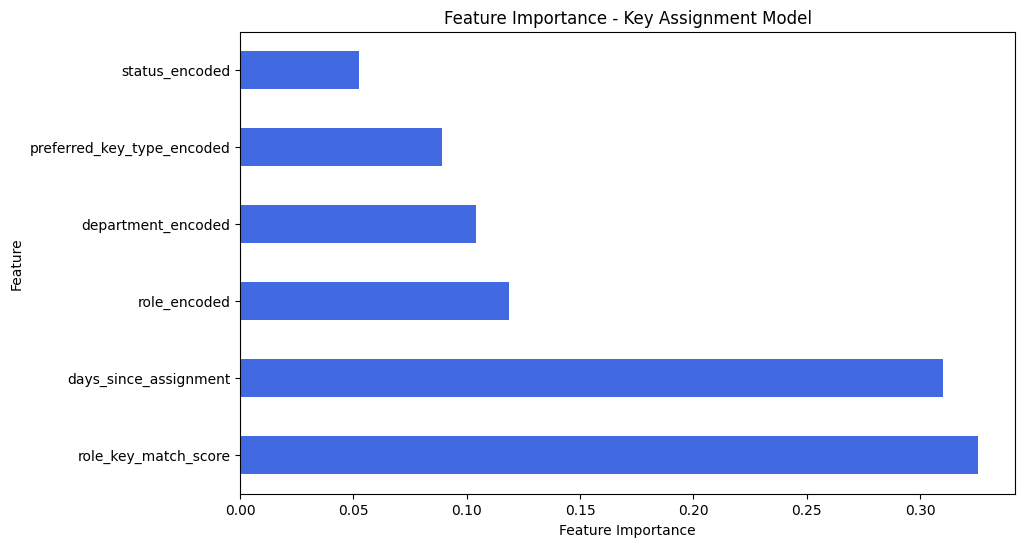

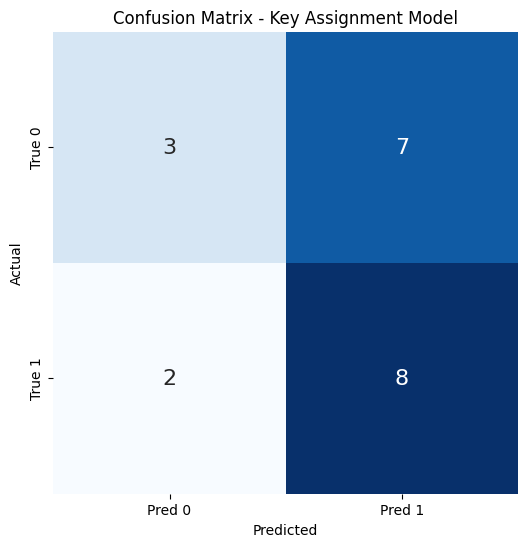

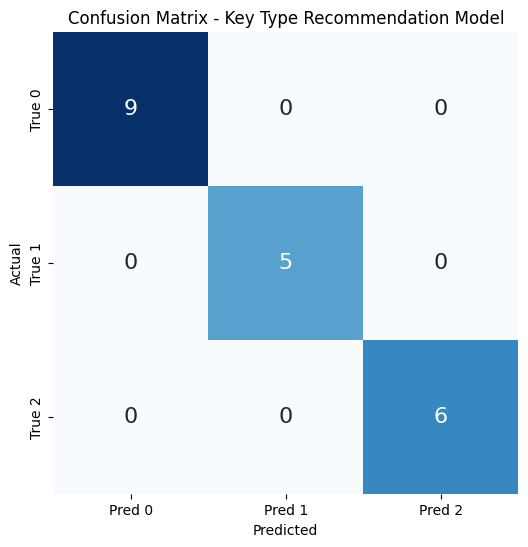

C:\Users\Gauri Patole\AppData\Local\Temp\ipykernel_18740\3955254958.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracy_scores, palette='viridis')


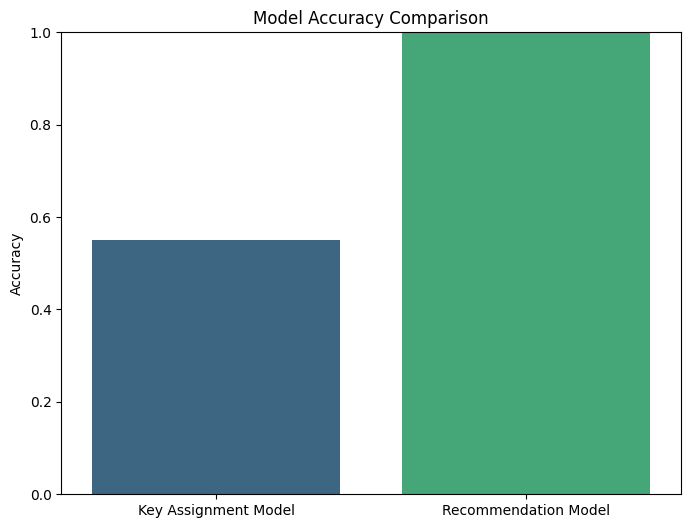

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------------------
# 1. Visualize the distribution of 'key_assigned' (target variable)
plt.figure(figsize=(8, 6))
sns.countplot(x='key_assigned', data=mock_df, palette='Set2')
plt.title("Distribution of Key Assignment (0: Not Assigned, 1: Assigned)")
plt.xlabel("Key Assignment")
plt.ylabel("Count")
plt.show()

# ----------------------------
# 2. Visualize feature importance from Random Forest for Key Assignment model
plt.figure(figsize=(10, 6))
feat_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh', color='royalblue')
plt.title("Feature Importance - Key Assignment Model")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.show()

# ----------------------------
# 3. Confusion Matrix for Key Assignment Model
plt.figure(figsize=(6, 6))
conf_matrix_df = pd.DataFrame(conf_matrix, index=['True 0', 'True 1'], columns=['Pred 0', 'Pred 1'])
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.title("Confusion Matrix - Key Assignment Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ----------------------------
# 4. Confusion Matrix for Recommendation Model
plt.figure(figsize=(6, 6))
recommendation_conf_matrix_df = pd.DataFrame(recommendation_conf_matrix, index=['True 0', 'True 1', 'True 2'], columns=['Pred 0', 'Pred 1', 'Pred 2'])
sns.heatmap(recommendation_conf_matrix_df, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.title("Confusion Matrix - Key Type Recommendation Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ----------------------------
# 5. Visualizing Model Accuracy Comparison
accuracy_scores = [accuracy, recommendation_accuracy]
model_names = ["Key Assignment Model", "Recommendation Model"]

plt.figure(figsize=(8, 6))
sns.barplot(x=model_names, y=accuracy_scores, palette='viridis')
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()
